In [2]:
import pickle
import sys
sys.path.append(f"../regression")
import acqf as a
import acquisition as aq
import modelling as md
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from rdkit.Chem import rdFMCS
import pandas as pd
import numpy as np
from sklearn.base import clone


/Users/anjali/miniconda3/envs/regio_ch/lib/python3.11/site-packages/dbstep/sterics.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/Users/anjali/Desktop/reisman lab/regiochem/active_learning/experimental/../regression/acqf.py:26: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS


In [3]:
target_SMILES = "CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12"
products = ["O=C(O[C@@]1(CC[C@@]23[H])C)C[C@@H]1[C@@]3(C)C[C@@H](O)CC2(C)C",
             "O=C(O[C@@]1(CC[C@@]23[H])C)C[C@@H]1[C@@]3(C)CCC(C2(C)C)=O",
             "O=C(O[C@@]1(CC[C@@]23[H])C)C[C@@H]1[C@@]3(C)CC(CC2(C)C)=O"]
sels = None
yields = [25, 57, 18]
feature_choice = "custom"
atom = "O"
df_folder = 'preprocessed_reactions_no_unspec_no_intra_unnorm'
file = "/Users/anjali/Desktop/reisman lab/regiochem/results/active_learning/regression/experimental/results_CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12_1_coldstart_custom.pkl"

In [4]:
if sels:
    target_df = pd.DataFrame({"Reactant_SMILES": [target_SMILES]*len(products), "Product_SMILES": products, "rxn_ID":[0]*len(products), "Selectivity (%)": sels})
else:
    target_df = pd.DataFrame({"Reactant_SMILES": [target_SMILES]*len(products), "Product_SMILES": products, "rxn_ID":[0]*len(products), "Yield (%)": yields, "Selectivity (%)":[np.nan]*len(products)})
target_df.to_csv("target.csv")

In [5]:
dfs = []
if feature_choice in ["xtb", "custom", "selected"]:
    target_df = md.prepare_reactivity_mapping('XTB', file="target.csv", 
                                            preprocess=True,
                                            normalize=False, threshold_correlated=1,
                                            rxn_folder="target_data", atom=atom)
    dfs.append(target_df)
if feature_choice in ["bde", "custom", "selected"]:
    target_df = md.prepare_reactivity_mapping('BDE', file="target.csv", 
                                            preprocess=True,
                                            normalize=False, threshold_correlated=1,
                                            rxn_folder="target_data", atom=atom)
    dfs.append(target_df)
if feature_choice in ["gas", "custom", "selected"]:
    target_df = md.prepare_reactivity_mapping('Gasteiger', file="target.csv", 
                                            preprocess=True,
                                            normalize=False, threshold_correlated=1,
                                            rxn_folder="target_data", atom=atom)
    dfs.append(target_df)
if feature_choice in ["env1", "selected"]:
    target_df = md.prepare_reactivity_mapping('ENV-1', file="target.csv", 
                                            preprocess=True,
                                            normalize=False, threshold_correlated=1,
                                            rxn_folder="target_data", atom=atom)
    dfs.append(target_df)
if feature_choice in ["env2", "selected"]:
    target_df = md.prepare_reactivity_mapping('ENV-2', file="target.csv", 
                                            preprocess=True,
                                            normalize=False, threshold_correlated=1,
                                            rxn_folder="target_data", atom=atom)
    dfs.append(target_df)
if feature_choice in ["dbstep", "selected"]:
    target_df = md.prepare_reactivity_mapping('DBSTEP', file="target.csv", 
                                            preprocess=True,
                                            normalize=False, threshold_correlated=1,
                                            rxn_folder="target_data", atom=atom)
    dfs.append(target_df)

df = a.make_descriptors_basic(option=feature_choice, df_folder=df_folder)
if len(dfs) == 1:
    targ = dfs[0]
else:
    targ = pd.DataFrame()
    for col in df.columns:
        for df_ in dfs:
            if col in df_.columns:
                targ[col] = df_[col]

100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


First part of the cleaning completed


100%|██████████| 1/1 [00:00<00:00, 372.83it/s]


0 molecules with no selectivity.


100%|██████████| 3/3 [00:00<00:00,  7.66it/s]


First part of the cleaning completed


100%|██████████| 1/1 [00:00<00:00, 471.27it/s]


0 molecules with no selectivity.


100%|██████████| 3/3 [00:00<00:00,  8.79it/s]


First part of the cleaning completed


100%|██████████| 1/1 [00:00<00:00, 764.55it/s]


0 molecules with no selectivity.


100%|██████████| 1/1 [00:00<00:00, 17.85it/s]


/Users/anjali/Desktop/reisman lab/regiochem


In [6]:
targ

,Reactant_SMILES,Atom_nº,Selectivity,Reactive Atom,bde_avg,gas_charge_C,gas_charge_H_max,Buried_Volume_C,Buried_Volume_H_max
0,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,0,0.0,3,98.527428,-0.05962,0.02360,0.39074,0.410280
1,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,3,57.0,3,97.354034,-0.04782,0.02721,0.54712,0.473642
2,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,4,43.0,3,96.529358,-0.05224,0.02669,0.48702,0.494893
3,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,5,0.0,3,94.760429,-0.04713,0.02724,0.57242,0.500961
4,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,7,0.0,3,98.276642,-0.05893,0.02363,0.54251,0.566460
5,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,8,0.0,3,92.356712,0.01463,0.03554,0.76964,0.628978
6,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,9,0.0,3,91.152313,0.05268,0.03898,0.54181,0.511898
7,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,14,0.0,3,100.862701,-0.02446,0.02713,0.45565,0.490822
8,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,15,0.0,3,96.656250,-0.01256,0.03076,0.52725,0.461098
9,CC1(C)CCC[C@]2(C)[C@H]3CC(=O)O[C@]3(C)CC[C@@H]12,16,0.0,3,94.470459,-0.04560,0.02713,0.60247,0.593995


In [7]:
# set atom of interest to most reactive carbon, or something other atom of interest
atom_of_interest = 3

In [8]:
def rank_of_atom(y_pt, atom_of_interest):
    sorted_items = sorted(y_pt.items(), key=lambda kv: (kv[1], kv[0]), reverse=True)

    for i in range(len(sorted_items)):
        kv = sorted_items[i]
        if kv[0] == atom_of_interest:
            return i+1

In [10]:
with open(file, 'rb') as f:
    results_1 = pickle.load(f)
t5, smis, carbon_preds = results_1

In [11]:
afs = ['random',
                             'acqf_1', 'acqf_10',
                             'acqf_2-1', 'acqf_3', 'acqf_4-1', 
                             'acqf_5', 'acqf_6', 'acqf_7', 'acqf_9']

In [12]:
af_mean_ranks = {}
for i in range(len(carbon_preds)):
    af_y = carbon_preds[i]
    af = afs[i]
    all_af_ranks = []
    for run in af_y:
        y = run[0]
        ranks = []
        for y_pt in y:
            ranks.append(rank_of_atom(y_pt, atom_of_interest))
        all_af_ranks.append(ranks)
    all_af_ranks = np.array(all_af_ranks)
    af_mean_ranks[af] = all_af_ranks.mean(axis=0)

In [19]:
labels = ["Random", "AL", "AL + Small molecules"]
colors = ['gray', 'skyblue','tab:blue']

In [20]:
import matplotlib.pyplot as plt

In [21]:
num_acqf = len(af_mean_ranks["random"])

In [22]:
afs_of_interest = ["random", "acqf_1", "acqf_10"]

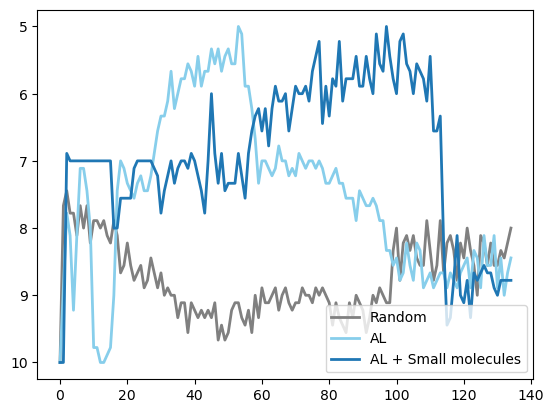

In [23]:
for i in range(len(afs_of_interest)):
    af = afs_of_interest[i]
    mean_ranks = af_mean_ranks[af]
    plt.plot(mean_ranks, color=colors[i], linewidth=2)
    plt.gca().invert_yaxis()
plt.legend(labels)